In [1]:
import numpy as np
import matplotlib.pyplot as plt
traces = np.load('./DATA/seismic2d.npy')
traces = traces[5:None,:]

In [2]:
p = 240
w = 100
searchw=100

trace1 = traces[:,74]
trace2 = traces[:,80]

search_template_trace1 = trace1[p-w:p+w]
score = []
for i in range(2*(searchw+w)+1):
    search_template_trace2 = trace2[(p-w)+(-searchw+i):(p+w)+(-searchw+i)]
    corr = np.corrcoef(search_template_trace1, search_template_trace2)[0,1]
    score.extend([corr])

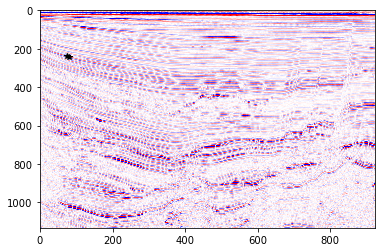

In [3]:
maxidx = np.argmax(score)

newpick = p+(maxidx-searchw)

vmin, vmax = np.percentile(traces,[5,95])
plt.imshow(traces, aspect='auto', cmap='bwr_r', vmin=vmin, vmax=vmax)
plt.plot(74,p,'k*')
plt.plot(80,newpick,'k*')
plt.show()